# Importing needed libraries

In [1]:
import pandas as pd #importing pandas library
import numpy as np  #importing numpy library
from matplotlib import pyplot as plt #importing pyplot for show plot
import warnings as wr #import warnings to avoid unnecessary warning message
wr.filterwarnings('ignore')

# Dataset Import

In [2]:
df= pd.read_csv("E:\Data Science Course_DataSet\Height-Weight Data - Height-Weight Data.csv") #dataset import
df.head() #showing first 5 data of the dataset

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
df.shape #checking the shape of whole dataset

(3501, 2)

In [4]:
df.isnull().sum()  #checking  null values 

Height    0
Weight    0
dtype: int64

# Scatter Plot

Text(0, 0.5, 'Weight')

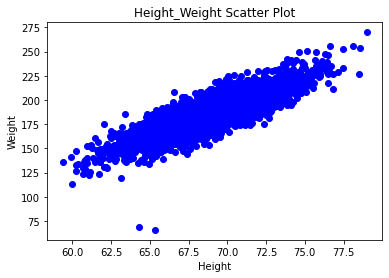

In [5]:
plt.scatter(df.Height,df.Weight,color="blue") #scatter plot
plt.title("Height_Weight Scatter Plot")  #plot title set
plt.xlabel("Height") #Labelling X axis
plt.ylabel("Weight") #Labelling Y axis

# Seperate dependent & independent variable

In [6]:
x=df.drop("Weight",axis=1) #drop dependent value, axis=1 means drop by coloumn
y=df[["Weight"]] #store dependent variable in y
x.head() #show first five data of x(independent variable)


,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [7]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [8]:
x.mean() #Showing Mean value of x

Height    69.024411
dtype: float64

In [9]:
y.mean() #Showing Mean value of x

Weight    186.891258
dtype: float64

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split  

In [11]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.20) #split Train and test value from x and y(train=80% data,test=20% data)
xtrain.head()

,Height
1387,68.407848
2126,71.370013
2491,69.893038
2767,67.766513
779,72.361983


In [12]:
ytrain.head()

,Weight
1387,177.110739
2126,205.538501
2491,194.532819
2767,172.669566
779,198.262970


In [13]:
xtest.head()

,Height
1588,72.367492
469,64.980456
2389,73.106059
2462,68.253487
391,65.575772


In [14]:
ytest.head()

,Weight
1588,218.394555
469,166.821547
2389,207.239547
2462,179.252156
391,173.691592


# Model Implement

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()  #Create function of linear regression
lr.fit(xtrain,ytrain) #Train data fit into model for trainning

LinearRegression()

In [17]:
m=lr.coef_ #checking coefficient value (m)

In [18]:
c=lr.intercept_ #checking Intercept value (c)

In [19]:
yp= m*70.769193+c # manually prediction check
yp

array([[197.29837659]])

In [20]:
lr.predict([[70.769193]]) #checking predition by model

array([[197.29837659]])

In [21]:
df["Predicted Weight"]=lr.predict(x) # creating a new column as "Predicted Weight" in dataset.
df.head()

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.704456
1,68.781904,162.310473,185.413942
2,74.110105,212.740856,217.277783
3,71.730978,220.042470,203.050069
4,69.881796,206.349801,191.991542


# Best Fit Line

Text(0, 0.5, 'Weight')

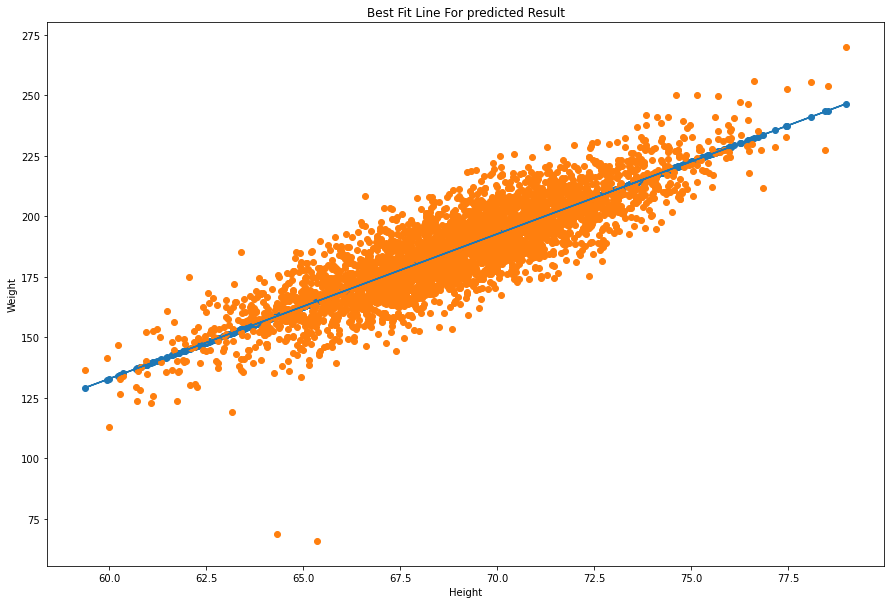

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(x.squeeze(),df[['Predicted Weight']]) #best fit line for predicted weight
plt.scatter(x,df[['Predicted Weight'],])  #best fit dot for predicted weight
plt.scatter(x,df[['Weight']]) #actual weight for compare
plt.title("Best Fit Line For predicted Result") #Set title for plot
plt.xlabel("Height")
plt.ylabel("Weight")

# Mean Squared Error and Mean absolute error

In [23]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,lr.predict(xtest)) #calulating Mean squared error by using test set
mse

106.17051624229126

In [24]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,lr.predict(xtest)) #calulating Mean absolute error by using test set
mae

8.201676589442986